**Chargement et exploration initiale du dataset**

Ce code permet de charger le dataset contenant les données de trafic à partir d'un fichier CSV. Une fois chargé, il affiche les premières lignes du dataset pour vérifier son contenu et identifier les colonnes présentes. Cette étape est cruciale pour s'assurer que les données sont bien importées et prêtes pour une exploration et un prétraitement ultérieurs.

In [ ]:
import pandas as pd

# Chargement du datasetfichier CSV
dataset_path = "C:/Users/ibrahim/Pictures/Trafic-main/data/Radar_Traffic_Counts.csv"
data = pd.read_csv(dataset_path)

if not isinstance(data, pd.DataFrame):
    raise TypeError("L'objet 'data' n'est pas un DataFrame. Vérifiez que le fichier a bien été chargé correctement.")

# Affichage des premières lignes
print("Les premières lignes du dataset :")
print(data.head())

# Affiche les informations du DataFrame
print("\nInformations sur le dataset :")
print(data.info())


Les premières lignes du dataset :
                                       location_name  location_latitude  \
0         2021 BLK KINNEY AVE (NW 300ft NW of Lamar)          30.248691   
1                 CAPITAL OF TEXAS HWY / LAKEWOOD DR          30.371674   
2  400 BLK AZIE MORTON RD (South of Barton Spring...          30.264245   
3  400 BLK AZIE MORTON RD (South of Barton Spring...          30.264245   
4         2021 BLK KINNEY AVE (NW 300ft NW of Lamar)          30.248691   

   location_longitude  Year  Month  Day  Day of Week  Hour  Minute Time Bin  \
0          -97.770409  2018      1   23            2    22      15    22:15   
1          -97.785660  2017     12   16            6    19      45    19:45   
2          -97.765802  2018      1   23            2    21      45    21:45   
3          -97.765802  2018      1   23            2    21      45    21:45   
4          -97.770409  2018      1   23            2    22      15    22:15   

  Direction  Volume  
0       NaN       

**Exploration et nettoyage des données**

Ce bloc de code réalise une analyse initiale du dataset pour comprendre sa structure, les types de données qu'il contient et pour identifier les éventuelles valeurs manquantes. Ensuite, une gestion basique des valeurs manquantes est appliquée en supprimant les lignes qui en contiennent. Enfin, les informations et un aperçu du dataset nettoyé sont affichés pour s'assurer que le nettoyage a été correctement effectué.

In [ ]:
# Affichage des informations du dataset
print("Informations du dataset :")
print(data.info())  # Structure et types des données
print("\nPremières lignes du dataset :")
print(data.head())

# Vérification des valeurs manquantes
print("\nValeurs manquantes par colonne :")
print(data.isnull().sum())

# Gestion des valeurs manquantes
data_cleaned = data.dropna()

# Vérification après nettoyage
print("\nDonnées après nettoyage :")
print(data_cleaned.info())
print(data_cleaned.head())

Informations du dataset :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4603861 entries, 0 to 4603860
Data columns (total 12 columns):
 #   Column              Dtype  
---  ------              -----  
 0   location_name       object 
 1   location_latitude   float64
 2   location_longitude  float64
 3   Year                int64  
 4   Month               int64  
 5   Day                 int64  
 6   Day of Week         int64  
 7   Hour                int64  
 8   Minute              int64  
 9   Time Bin            object 
 10  Direction           object 
 11  Volume              int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 421.5+ MB
None

Premières lignes du dataset :
                                       location_name  location_latitude  \
0         2021 BLK KINNEY AVE (NW 300ft NW of Lamar)          30.248691   
1                 CAPITAL OF TEXAS HWY / LAKEWOOD DR          30.371674   
2  400 BLK AZIE MORTON RD (South of Barton Spring...          30.264245   

**Suppression des lignes avec des valeurs manquantes**



In [15]:
# Vérification du nombre de valeurs manquantes dans la colonne 'Direction'
print("Nombre de valeurs NaN dans la colonne 'Direction' :", data['Direction'].isna().sum())

# Supprime les lignes où la colonne 'Direction' est NaN
data_cleaned = data.dropna(subset=['Direction'])

# Vérification de la nouvelle forme du dataset
print("Dimensions du dataset après suppression :", data_cleaned.shape)


Nombre de valeurs NaN dans la colonne 'Direction' : 262068
Dimensions du dataset après suppression : (4341793, 12)


**Calcul des statistiques descriptives**

Cette étape consiste à résumer les colonnes numériques du dataset en calculant des mesures statistiques clés, telles que la moyenne, la médiane, l'écart-type, le minimum et le maximum. Ces statistiques nous donnent une idée générale des distributions des données et aident à détecter des anomalies ou des valeurs extrêmes.

In [16]:
# Calcul des statistiques pour les colonnes numériques
stats_summary = data_cleaned.describe()

# Affiche les statistiques
print(stats_summary)


       location_latitude  location_longitude          Year         Month  \
count       4.341793e+06        4.341793e+06  4.341793e+06  4.341793e+06   
mean        3.029603e+01       -9.775958e+01  2.018200e+03  6.814161e+00   
std         5.300354e-02        2.787500e-02  7.081701e-01  3.353139e+00   
min         3.024387e+01       -9.781225e+01  2.017000e+03  1.000000e+00   
25%         3.025799e+01       -9.778171e+01  2.018000e+03  4.000000e+00   
50%         3.026680e+01       -9.775174e+01  2.018000e+03  7.000000e+00   
75%         3.033947e+01       -9.773726e+01  2.019000e+03  1.000000e+01   
max         3.040229e+01       -9.771761e+01  2.019000e+03  1.200000e+01   

                Day   Day of Week          Hour        Minute        Volume  
count  4.341793e+06  4.341793e+06  4.341793e+06  4.341793e+06  4.341793e+06  
mean   1.545859e+01  2.984069e+00  1.152905e+01  2.255076e+01  7.107279e+01  
std    8.779839e+00  2.016226e+00  6.921776e+00  1.679784e+01  6.339376e+01  
min

**Analyse exploratoire visuelle des volumes de trafic**

Cette étape vise à analyser comment le trafic évolue au fil du temps. Nous allons examiner les volumes de trafic par heure, par jour de la semaine, et par mois pour détecter des patterns ou des saisons qui pourraient influencer le trafic.

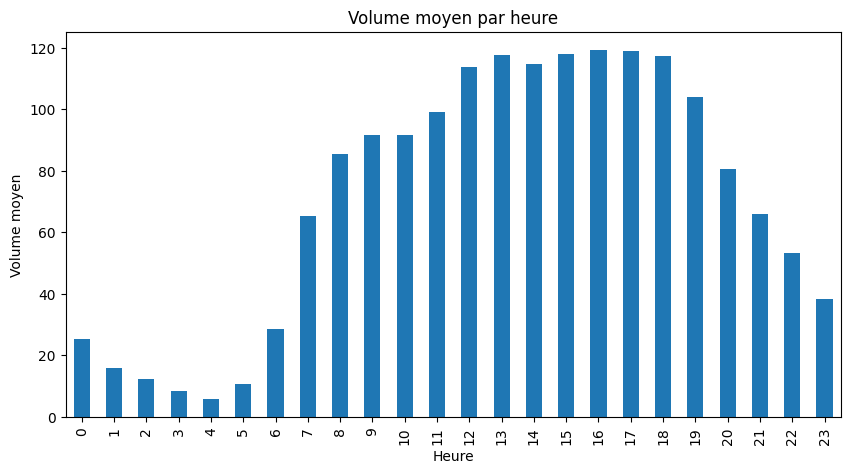

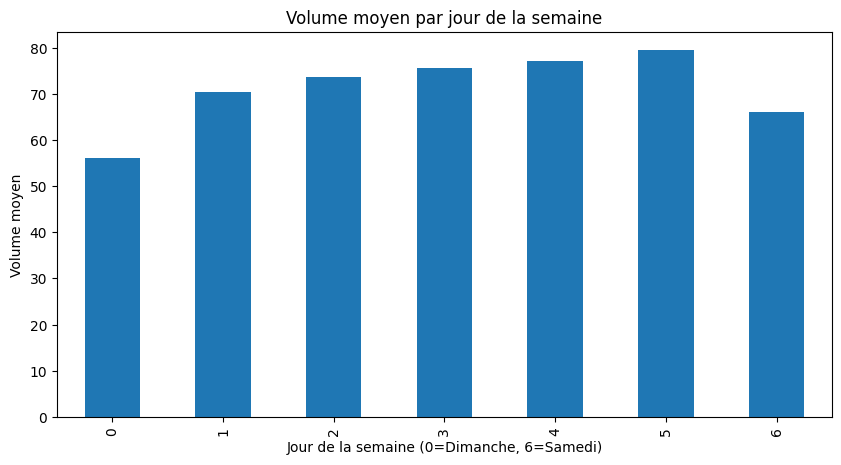

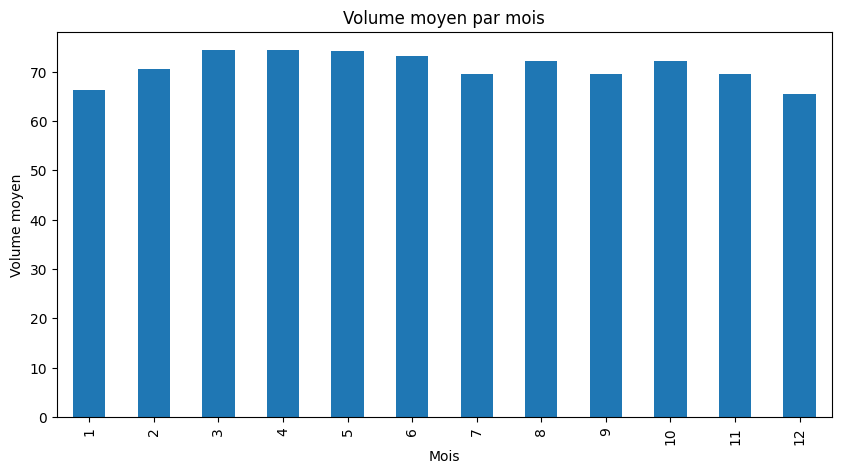

In [17]:
import matplotlib.pyplot as plt

# Volume de trafic par heure
data_cleaned.groupby('Hour')['Volume'].mean().plot(kind='bar', figsize=(10, 5))
plt.title("Volume moyen par heure")
plt.xlabel("Heure")
plt.ylabel("Volume moyen")
plt.show()

# Volume de trafic par jour de la semaine
data_cleaned.groupby('Day of Week')['Volume'].mean().plot(kind='bar', figsize=(10, 5))
plt.title("Volume moyen par jour de la semaine")
plt.xlabel("Jour de la semaine (0=Dimanche, 6=Samedi)")
plt.ylabel("Volume moyen")
plt.show()

# Volume de trafic par mois
data_cleaned.groupby('Month')['Volume'].mean().plot(kind='bar', figsize=(10, 5))
plt.title("Volume moyen par mois")
plt.xlabel("Mois")
plt.ylabel("Volume moyen")
plt.show()


**Préparation des données temporelles et encodage des jours de la semaine**

Pour optimiser les performances des modèles de deep learning, nous ajoutons des caractéristiques utiles aux données existantes. Dans cette étape, nous :

1. Transformons la colonne Time Bin en minutes depuis minuit pour obtenir une valeur numérique.
2. Encodons la colonne Day of Week (jour de la semaine) en une représentation catégorique ou numérique si nécessaire.

In [ ]:
import numpy as np

# Conversion de 'Time Bin' en minutes depuis minuit
time_bin_minutes = np.array([
    int(x.split(':')[0]) * 60 + int(x.split(':')[1])
    for x in data_cleaned['Time Bin']
])

# Encodage de 'Day of Week' en One-Hot Encoding
days = data_cleaned['Day of Week'].values
unique_days = sorted(set(days))
day_of_week_encoded = np.zeros((len(days), len(unique_days)))

for idx, day in enumerate(unique_days):
    day_of_week_encoded[:, idx] = (days == day).astype(int)

# Création d'une copie pour éviter SettingWithCopyWarning
data_cleaned = data_cleaned.copy()

# Ajout de 'Time Bin Minutes' et les colonnes encodées au dataset original
data_cleaned.loc[:, 'Time Bin Minutes'] = time_bin_minutes
for idx, day in enumerate(unique_days):
    data_cleaned.loc[:, f'Day_{day}'] = day_of_week_encoded[:, idx]

# Résultat vérifié
print(data_cleaned[['Time Bin', 'Time Bin Minutes']].head())
print(data_cleaned.filter(like='Day_').head())

# Ajout de la variable data_prepared pour la prochaine étape
data_prepared = data_cleaned.copy()


  Time Bin  Time Bin Minutes
1    19:45              1185
2    21:45              1305
3    21:45              1305
5    22:15              1335
6    22:15              1335
   Day_0  Day_1  Day_2  Day_3  Day_4  Day_5  Day_6
1    0.0    0.0    0.0    0.0    0.0    0.0    1.0
2    0.0    0.0    1.0    0.0    0.0    0.0    0.0
3    0.0    0.0    1.0    0.0    0.0    0.0    0.0
5    0.0    0.0    1.0    0.0    0.0    0.0    0.0
6    0.0    0.0    1.0    0.0    0.0    0.0    0.0


**Préparation des données pour l'entraînement du modèle**

La normalisation consiste à redimensionner les colonnes numériques pour les placer dans une plage similaire (par exemple, entre 0 et 1). Cela aide les modèles à converger plus rapidement et améliore la stabilité des calculs.

In [19]:
from sklearn.preprocessing import MinMaxScaler

# Défininition de la taille de la fenêtre
window_size = 7 

#Colonnes pertinentes pour le modèle
columns_to_keep = ['Time Bin Minutes', 'Volume'] + list(data_prepared.filter(like='Day_').columns)

# Normalisation des colonnes numériques à normaliser
columns_to_normalize = ['Volume', 'Time Bin Minutes']
scaler = MinMaxScaler()

# Vérification des colonnes avant de continuer
if not all(col in data_prepared.columns for col in columns_to_keep):
    raise ValueError(f"Certaines colonnes manquent dans 'data_prepared' : {columns_to_keep}")

# Copie pour éviter d'altérer l'original
data_prepared_normalized = data_prepared.copy()

# Normalisation des colonnes numériques
data_prepared_normalized[columns_to_normalize] = scaler.fit_transform(data_prepared_normalized[columns_to_normalize])

# Génération du tableau NumPy à partir des données normalisées
data_array = data_prepared_normalized[columns_to_keep].values
print(f"Forme initiale des données : {data_array.shape}")

#Génère les séquences et les cibles
num_windows = len(data_array) - window_size
if num_windows <= 0:
    raise ValueError("La taille totale des données est insuffisante pour créer des séquences avec la fenêtre spécifiée.")

input_sequences = np.array([data_array[i:i + window_size] for i in range(num_windows)])
targets = np.array([data_array[i + window_size, 1] for i in range(num_windows)])

# Vérification des dimensions des séquences et des cibles
print(f"Forme des séquences générées : {input_sequences.shape}")
print(f"Forme des cibles générées : {targets.shape}")

#Conversion en DataFrame pour faciliter l'utilisation
data_final = pd.DataFrame({
    'Input Sequence': list(input_sequences),
    'Target': targets
})

# Affichage des dimensions des données générées
print(f"Nombre total de fenêtres générées : {len(data_final)}")
print(data_final.head())

# Assignation des données à X et y
X = np.stack(data_final['Input Sequence'].values)
y = data_final['Target'].values

# Vérification des formes finales de X et y
print(f"Forme finale de X : {X.shape}") 
print(f"Forme finale de y : {y.shape}")


Forme initiale des données : (4341793, 9)
Forme des séquences générées : (4341786, 7, 9)
Forme des cibles générées : (4341786,)
Nombre total de fenêtres générées : 4341786
                                      Input Sequence    Target
0  [[0.831578947368421, 0.403921568627451, 0.0, 0...  0.156863
1  [[0.9157894736842105, 0.17254901960784313, 0.0...  0.192157
2  [[0.9157894736842105, 0.050980392156862744, 0....  0.184314
3  [[0.9368421052631578, 0.10196078431372549, 0.0...  0.325490
4  [[0.9368421052631578, 0.12156862745098039, 0.0...  0.419608
Forme finale de X : (4341786, 7, 9)
Forme finale de y : (4341786,)


**Construction et préparation du modèle CNN + LSTM**

Dans cette étape, nous définissons et préparons un modèle combinant les architectures CNN (Convolutional Neural Network) et LSTM (Long Short-Term Memory), conçu pour traiter des séquences temporelles tout en capturant à la fois les dépendances locales (avec CNN) et les dépendances à long terme (avec LSTM).

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, LSTM, Dense, Dropout, TimeDistributed
from tensorflow.keras.optimizers import Adam

# Ajustement de X pour reshape
timesteps = 7  
num_features = X.shape[2] 
num_samples = (X.shape[0] // timesteps) * timesteps

if X.shape[0] % timesteps != 0:
    padding = timesteps - (X.shape[0] % timesteps)
    print(f"Ajout de padding : {padding} lignes")
    X = np.pad(X, ((0, padding), (0, 0), (0, 0)), mode='constant', constant_values=0)
    y = np.pad(y, (0, padding), mode='constant', constant_values=0)

# Reshape pour inclure les timesteps
X = X.reshape((-1, timesteps, num_features))
y = y[:len(X)] 
print(f"Nouvelle forme de X : {X.shape} (nombre_samples, timesteps, num_features)")
print(f"Nouvelle forme de y : {y.shape} (nombre_samples,)")

# Construction du modèle
model = Sequential([
    Input(shape=(X.shape[1], X.shape[2])),
    Conv1D(filters=64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Dropout(0.2),
    Conv1D(filters=128, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Dropout(0.2),
    LSTM(100, return_sequences=True),
    Dropout(0.2),
    LSTM(100, return_sequences=True),
    Dropout(0.2),
    LSTM(100, return_sequences=True),
    Dropout(0.2),
    LSTM(100, return_sequences=True),
    Dropout(0.2),
    TimeDistributed(Dense(1, activation='linear'))
])

# Compilation
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# Affichage du résumé du modèle
model.summary()


Ajout de padding : 6 lignes
Nouvelle forme de X : (4341792, 7, 9) (nombre_samples, timesteps, num_features)
Nouvelle forme de y : (4341792,) (nombre_samples,)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 5, 64)          │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 2, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 2, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 0, 128)         │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 0, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 0, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 0, 100)         │        91,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 0, 100)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 0, 100)         │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 0, 100)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 0, 100)         │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 0, 100)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_8 (LSTM)                   │ (None, 0, 100)         │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 0, 100)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed                │ (None, 0, 1)           │           101 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 359,397 (1.37 MB)

 Trainable params: 359,397 (1.37 MB)

 Non-trainable params: 0 (0.00 B)

**Entraînement du modèle**

Nous entraînons le modèle sur les données préparées :

En utilisant une validation croisée (validation_split).
En spécifiant le nombre d'époques et la taille des lots.

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Vérification des données avant l'entraînement
try:
    print(f"Forme de X avant ajustement : {X.shape}")
    print(f"Forme de y : {y.shape}")
except NameError:
    raise NameError("Les variables X et y ne sont pas définies. Assurez-vous d'avoir préparé les données correctement avant cette étape.")

# Vérification de cohérence entre X et y
if X.shape[0] != y.shape[0]:
    print("Ajustement de y pour correspondre à X...")
    y = y[:X.shape[0]]  
    print(f"Nouvelle forme de y : {y.shape}")

# Définition du callback EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',        
    patience=10,               
    restore_best_weights=True  
)

# Vérification et ajustement du kernel_size
kernel_size = min(2, X.shape[1]) 
print(f"Utilisation de kernel_size = {kernel_size}")

# Construction du modèle avec la couche Input
model = Sequential([
    Input(shape=(X.shape[1], X.shape[2])),  # Couche Input pour définir la forme
    Conv1D(filters=64, kernel_size=kernel_size, activation='relu'),
    MaxPooling1D(pool_size=2),  # Réduction de la dimension
    Dropout(0.2),
    LSTM(100, return_sequences=True),
    Dropout(0.2),
    Dense(1, activation='linear')  # Couche de sortie
])

# Compilation du modèle
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mse',
    metrics=['mae']
)

# Entraînement du modèle
history = model.fit(
    X, y,
    epochs=10,  # ici nous utilisons 10 époques
    batch_size=32,  # Taille des lots d'entraînement
    validation_split=0.2,  #20 % des données pour validation
    callbacks=[early_stopping],
    verbose=1  # Affichage des détails de chaque epoque
)

# Chemin complet pour sauvegarder le modèle
save_path = "C:/Users/ibrahim/Pictures/Trafic-main/models/traffic_prediction_model_complex.keras"
model.save(save_path)
print(f"Modèle entraîné et sauvegardé avec succès à l'emplacement : {save_path}")


Forme de X avant ajustement : (4341792, 7, 9)
Forme de y : (4341792,)
Utilisation de kernel_size = 2
Epoch 1/10
108545/108545 ━━━━━━━━━━━━━━━━━━━━ 907s 8ms/step - loss: 0.0614 - mae: 0.2067 - val_loss: 0.0629 - val_mae: 0.2081
Epoch 2/10
108545/108545 ━━━━━━━━━━━━━━━━━━━━ 1386s 13ms/step - loss: 0.0613 - mae: 0.2067 - val_loss: 0.0625 - val_mae: 0.2085
Epoch 3/10
108545/108545 ━━━━━━━━━━━━━━━━━━━━ 1007s 9ms/step - loss: 0.0612 - mae: 0.2065 - val_loss: 0.0626 - val_mae: 0.2073
Epoch 4/10
108545/108545 ━━━━━━━━━━━━━━━━━━━━ 1030s 9ms/step - loss: 0.0613 - mae: 0.2066 - val_loss: 0.0627 - val_mae: 0.2082
Epoch 5/10
108545/108545 ━━━━━━━━━━━━━━━━━━━━ 1001s 9ms/step - loss: 0.0613 - mae: 0.2066 - val_loss: 0.0625 - val_mae: 0.2079
Epoch 6/10
108545/108545 ━━━━━━━━━━━━━━━━━━━━ 985s 9ms/step - loss: 0.0613 - mae: 0.2067 - val_loss: 0.0625 - val_mae: 0.2084
Epoch 7/10
108545/108545 ━━━━━━━━━━━━━━━━━━━━ 1120s 10ms/step - loss: 0.0612 - mae: 0.2066 - val_loss: 0.0624 - val_mae: 0.2086
Epoch 8/10

**Évaluation des performances du modèle**



1. Visualisation des courbes de perte

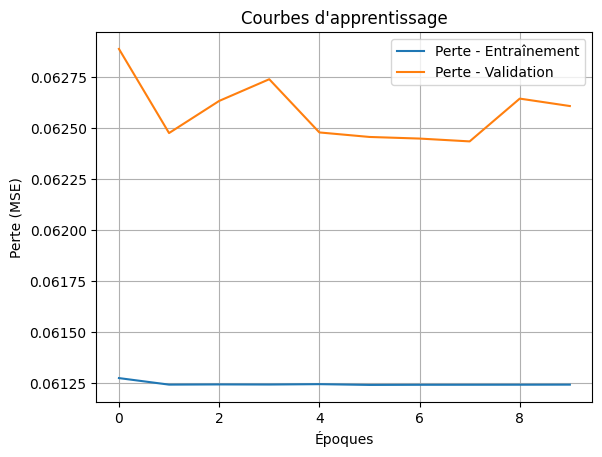

In [44]:
if 'history' in locals():
    plt.plot(history.history['loss'], label='Perte - Entraînement')
    plt.plot(history.history['val_loss'], label='Perte - Validation')
    plt.title("Courbes d'apprentissage")
    plt.xlabel("Époques")
    plt.ylabel("Perte (MSE)")
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("La variable 'history' n'est pas définie. Assurez-vous que le modèle a été entraîné.")


2.  Calcul des métriques (MSE et MAE)

In [45]:
# Évaluation sur le jeu de validation
val_loss, val_mae = model.evaluate(X, y, verbose=0)
print(f"Perte sur validation (MSE) : {val_loss:.4f}")
print(f"Erreur absolue moyenne (MAE) : {val_mae:.4f}")


Perte sur validation (MSE) : 0.0604
Erreur absolue moyenne (MAE) : 0.2056


**Chargement et utilisation du modèle**

1. Chargement du modèle sauvegardé

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import MeanAbsoluteError

# Chargement du modèle avec les métriques spécifiques
load_path = "C:/Users/ibrahim/Pictures/Trafic-main/models/traffic_prediction_model_complex.keras"
model = load_model(
    load_path,
    custom_objects={
        'mse': MeanSquaredError(),
        'mae': MeanAbsoluteError()
    }
)
print("Modèle chargé avec succès.")



Modèle chargé avec succès.


2. Prédictions et comparaison avec les valeurs réelles

In [ ]:
# Faire des prédictions
sample_data = X[:10]  # Exemple : Les 10 premières lignes
predictions = model.predict(sample_data).flatten()

# Affichage des prédictions et les valeurs réelles
print("Prédictions :", predictions)
print("Valeurs réelles :", y[:10])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step
Prédictions : [0.2790217  0.27843702 0.2781616  0.27877223 0.27825364 0.27835688
 0.2787686  0.27825284 0.2785534  0.27863055 0.27846798 0.27864763
 0.27863055 0.2786717  0.27875167 0.27889946 0.27877674 0.2797367
 0.27912414 0.2788841  0.28086117 0.27916914 0.27987638 0.28067362
 0.2792288  0.2810168  0.28023002 0.28025538 0.28082255 0.2802868 ]
Valeurs réelles : [0.15686275 0.19215686 0.18431373 0.3254902  0.41960784 0.42745098
 0.25490196 0.37254902 0.34509804 0.18823529]


**Analyse des résultats**

1. Comparaison des prédictions et des valeurs réelles

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step 


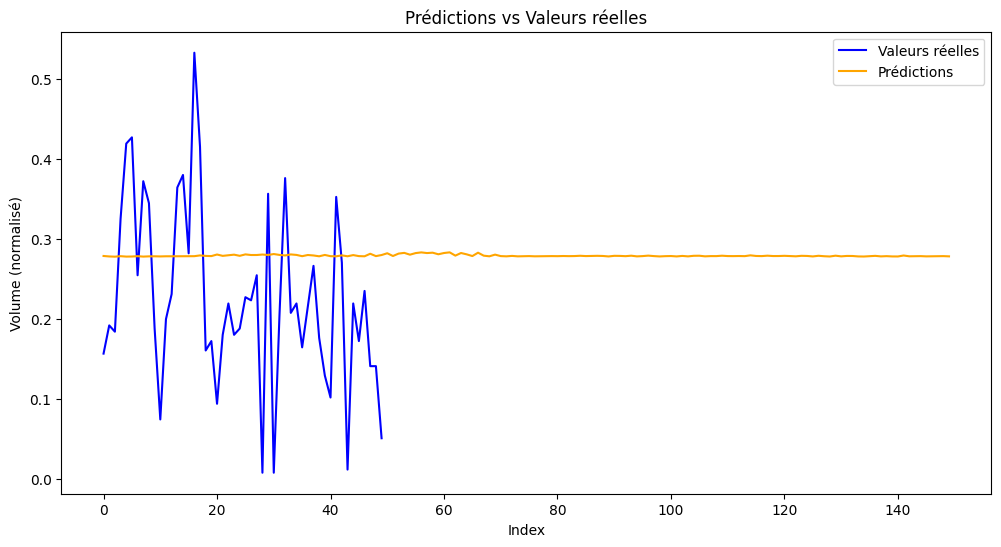

In [ ]:
# Échantillon des valeurs réelles et prédites
real_values = y[:50]
predicted_values = model.predict(X[:50]).flatten()

# Traçage des deux courbes
plt.figure(figsize=(12, 6))
plt.plot(real_values, label='Valeurs réelles', color='blue')
plt.plot(predicted_values, label='Prédictions', color='orange')
plt.title('Prédictions vs Valeurs réelles')
plt.xlabel('Index')
plt.ylabel('Volume (normalisé)')
plt.legend()
plt.show()


2. Distribution des erreurs

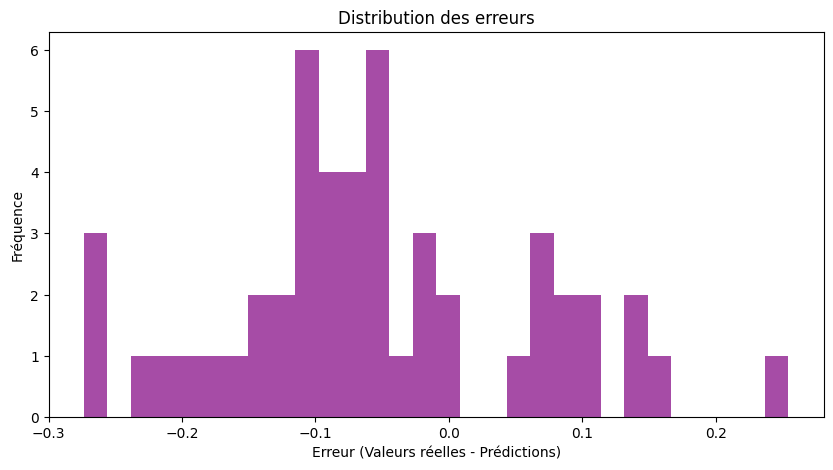

In [ ]:
real_values = real_values[:len(predicted_values)]
predicted_values = predicted_values[:len(real_values)]

# Calcul des erreurs
errors = real_values - predicted_values

# Histogramme des erreurs
plt.figure(figsize=(10, 5))
plt.hist(errors, bins=30, color='purple', alpha=0.7)
plt.title('Distribution des erreurs')
plt.xlabel('Erreur (Valeurs réelles - Prédictions)')
plt.ylabel('Fréquence')
plt.show()



**Calcul du coefficient de détermination 𝑅^2**

Ce code calcule le coefficient de détermination (𝑅^2), une métrique qui mesure la qualité des prédictions du modèle. 

In [50]:
from sklearn.metrics import r2_score

X_adjusted = X[:len(y)]  

# Effectuer les prédictions
predicted_values = model.predict(X_adjusted)

# Vérification des dimensions et ajustement
if predicted_values.ndim > 1:
    predicted_values = predicted_values.reshape(-1)  # Aplatir les prédictions

# Vérification lds tailles avant de faire le calcul
if len(predicted_values) > len(y):
    predicted_values = predicted_values[:len(y)]
elif len(predicted_values) < len(y):
    y = y[:len(predicted_values)]

print(f"Taille de y : {len(y)}")
print(f"Taille des prédictions : {len(predicted_values)}")

# Calcul de R^2 après ajustement
try:
    r2 = r2_score(y, predicted_values)
    print(f"Coefficient de détermination (R^2) : {r2:.4f}")
except ValueError as e:
    print(f"Erreur lors du calcul de R^2 : {e}")


135681/135681 ━━━━━━━━━━━━━━━━━━━━ 426s 3ms/step
Taille de y : 4341792
Taille des prédictions : 4341792
Coefficient de détermination (R^2) : -0.0004


**Construction du modèle Transformer**

Dans cette étape, nous construisons un modèle Transformer capable de traiter des séquences temporelles complexes. Le modèle utilise des blocs Transformer, composés de couches de Multi-Head Attention pour apprendre les relations entre les différents timesteps, suivies de connexions résiduelles et de normalisation pour améliorer la stabilité de l'apprentissage. Chaque bloc inclut également un réseau feedforward pour enrichir les caractéristiques extraites. Une étape de pooling global est ensuite utilisée pour condenser l'information sur toute la séquence en une seule représentation, avant qu'une couche dense finale ne produise une prédiction adaptée à la tâche de régression.

In [53]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, LayerNormalization, MultiHeadAttention, GlobalAveragePooling1D
from tensorflow.keras.optimizers import Adam

def build_transformer_model(input_shape, num_heads=4, ff_dim=128, num_transformer_blocks=2):
    # Entrée des données
    inputs = Input(shape=input_shape)

    # Blocs Transformer
    x = inputs
    for _ in range(num_transformer_blocks):
        # Multi-Head Attention
        attn_output = MultiHeadAttention(num_heads=num_heads, key_dim=input_shape[-1])(x, x)
        attn_output = Dropout(0.1)(attn_output)
        x = LayerNormalization(epsilon=1e-6)(x + attn_output)

        # Réseau feedforward
        ffn_output = Dense(ff_dim, activation="relu")(x)
        ffn_output = Dense(input_shape[-1])(ffn_output)
        ffn_output = Dropout(0.1)(ffn_output)
        x = LayerNormalization(epsilon=1e-6)(x + ffn_output)

    # Pooling global pour obtenir une seule sortie par séquence
    x = GlobalAveragePooling1D()(x)

    # Couche dense finale pour la prédiction
    outputs = Dense(1, activation="linear")(x)

    # Construiction du modèle
    model = Model(inputs, outputs)
    return model


**Compilation et configuration du modèle Transformer**

Cette étape consiste à configurer le modèle Transformer pour la tâche de prédiction. D'abord, la forme des données d'entrée est définie pour s'assurer que le modèle reçoit des séquences de dimensions correctes. Ensuite, le modèle est construit avec des paramètres spécifiques comme le nombre de têtes d'attention, la dimension du réseau feedforward, et le nombre de blocs Transformer. Le modèle est compilé avec l'optimiseur Adam, une fonction de perte adaptée à la régression (MSE), et la métrique MAE pour évaluer les performances. Enfin, un résumé du modèle est affiché pour valider sa structure.

In [54]:
# Forme d'entrée pour le modèle
input_shape = (X.shape[1], X.shape[2])

# Construiction du modèle Transformer
transformer_model = build_transformer_model(
    input_shape=input_shape,
    num_heads=4,  # Nombre de têtes d'attention
    ff_dim=128,   # Dimension du réseau feedforward
    num_transformer_blocks=2  # Nombre de blocs Transformer
)

# Compilation du modèle
transformer_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mse',
    metrics=['mae']
)

# Affichage du résumé du modèle
transformer_model.summary()


Model: "functional_52"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7       │ (None, 7, 9)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 7, 9)      │      1,413 │ input_layer_7[0]… │
│ (MultiHeadAttentio… │                   │            │ input_layer_7[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_22          │ (None, 7, 9)      │          0 │ multi_head_atten… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 7, 9)      │          0 │ input_layer_7[0]… │
│                     │                   │            │ dropout_22[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalization │ (None, 7, 9)      │         18 │ add[0][0]         │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 7, 128)    │      1,280 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_8 (Dense)     │ (None, 7, 9)      │      1,161 │ dense_7[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_23          │ (None, 7, 9)      │          0 │ dense_8[0][0]     │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 7, 9)      │          0 │ layer_normalizat… │
│                     │                   │            │ dropout_23[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 7, 9)      │         18 │ add_1[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 7, 9)      │      1,413 │ layer_normalizat… │
│ (MultiHeadAttentio… │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_25          │ (None, 7, 9)      │          0 │ multi_head_atten… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_2 (Add)         │ (None, 7, 9)      │          0 │ layer_normalizat… │
│                     │                   │            │ dropout_25[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 7, 9)      │         18 │ add_2[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_9 (Dense)     │ (None, 7, 128)    │      1,280 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_10 (Dense)    │ (None, 7, 9)      │      1,161 │ dense_9[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_26          │ (None, 7, 9)      │          0 │ dense_10[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_3 (Add)         │ (None, 7, 9)      │          0 │ layer_normalizat… │
│                     │                   │            │ dropout_26[0][0]

 Total params: 7,790 (30.43 KB)

 Trainable params: 7,790 (30.43 KB)

 Non-trainable params: 0 (0.00 B)

**Entraînement et sauvegarde du modèle Transformer**

Dans cette étape, le modèle Transformer est entraîné sur les données d'entrée (X) et les cibles (y). Les hyperparamètres d'entraînement, comme le nombre d'époques, la taille des lots, et la fraction des données réservée à la validation, sont spécifiés. Une fois l'entraînement terminé, le modèle est sauvegardé dans un fichier .keras pour une utilisation ou un déploiement ultérieur. Cette sauvegarde permet de réutiliser le modèle sans avoir à le réentraîner.

In [ ]:
# Entraînement du modèle
history_transformer = transformer_model.fit(
    X, y,
    epochs=10,  # Nombre d'époques
    batch_size=32,  # Taille des lots
    validation_split=0.2,  # 20 % des données pour validation
    verbose=1  # Affichage des détails
)
# Sauvegarde du modèle
transformer_save_path = "C:/Users/ibrahim/Pictures/Trafic-main/models/transformer_model.keras"
transformer_model.save(transformer_save_path)
print(f"Modèle Transformer sauvegardé avec succès à l'emplacement : {transformer_save_path}")



Epoch 1/10
108545/108545 ━━━━━━━━━━━━━━━━━━━━ 2371s 22ms/step - loss: 0.0359 - mae: 0.1359 - val_loss: 0.0336 - val_mae: 0.1299
Epoch 2/10
108545/108545 ━━━━━━━━━━━━━━━━━━━━ 2760s 25ms/step - loss: 0.0337 - mae: 0.1299 - val_loss: 0.0335 - val_mae: 0.1300
Epoch 3/10
108545/108545 ━━━━━━━━━━━━━━━━━━━━ 2861s 26ms/step - loss: 0.0335 - mae: 0.1294 - val_loss: 0.0334 - val_mae: 0.1295
Epoch 4/10
108545/108545 ━━━━━━━━━━━━━━━━━━━━ 2891s 27ms/step - loss: 0.0335 - mae: 0.1293 - val_loss: 0.0334 - val_mae: 0.1296
Epoch 5/10
108545/108545 ━━━━━━━━━━━━━━━━━━━━ 2804s 26ms/step - loss: 0.0334 - mae: 0.1292 - val_loss: 0.0334 - val_mae: 0.1295
Epoch 6/10
108545/108545 ━━━━━━━━━━━━━━━━━━━━ 2868s 26ms/step - loss: 0.0334 - mae: 0.1291 - val_loss: 0.0338 - val_mae: 0.1302
Epoch 7/10
108545/108545 ━━━━━━━━━━━━━━━━━━━━ 3132s 29ms/step - loss: 0.0334 - mae: 0.1291 - val_loss: 0.0337 - val_mae: 0.1304
Epoch 8/10
108545/108545 ━━━━━━━━━━━━━━━━━━━━ 6012s 55ms/step - loss: 0.0333 - mae: 0.1290 - val_loss: 0

**Courbes d'apprentissage pour le Transformer**



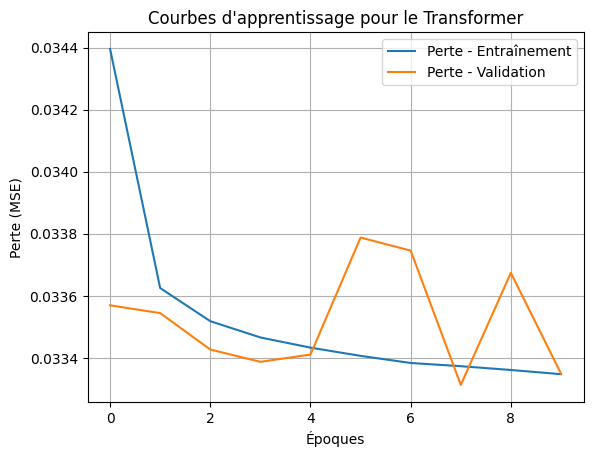

In [62]:
if 'history_transformer' in locals():
    plt.plot(history_transformer.history['loss'], label='Perte - Entraînement')
    plt.plot(history_transformer.history['val_loss'], label='Perte - Validation')
    plt.title("Courbes d'apprentissage pour le Transformer")
    plt.xlabel("Époques")
    plt.ylabel("Perte (MSE)")
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("La variable 'history_transformer' n'est pas définie. Vérifiez l'entraînement du Transformer.")


**Évaluation des performances du modèle Transformer**

Cette étape évalue les performances du modèle Transformer sur les données d'entrée (X) et les cibles (y). Les métriques utilisées sont la perte moyenne quadratique (MSE), qui mesure l'écart moyen au carré entre les prédictions et les valeurs réelles, et l'erreur absolue moyenne (MAE), qui quantifie la précision moyenne des prédictions. Ces résultats permettent de juger de la qualité du modèle sur l'ensemble de validation.

In [57]:
# Évaluation sur les données
val_loss_transformer, val_mae_transformer = transformer_model.evaluate(X, y, verbose=0)
print(f"Perte (MSE) sur validation pour le Transformer : {val_loss_transformer:.4f}")
print(f"Erreur absolue moyenne (MAE) pour le Transformer : {val_mae_transformer:.4f}")


Perte (MSE) sur validation pour le Transformer : 0.0334
Erreur absolue moyenne (MAE) pour le Transformer : 0.1292


**Comparaison des courbes de validation entre CNN+LSTM et Transformer**

Ce code compare les courbes de perte (MSE) sur l'ensemble de validation pour les deux modèles : CNN+LSTM et Transformer. Il trace les pertes respectives au fil des époques, permettant de visualiser lequel des deux modèles converge mieux et offre une meilleure généralisation. Cette analyse aide à identifier le modèle le plus performant pour la tâche donnée.

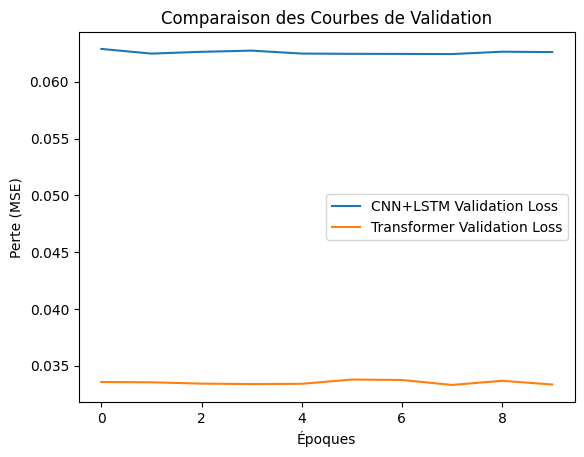

In [58]:
# Comparaison des courbes de perte
plt.plot(history.history['val_loss'], label='CNN+LSTM Validation Loss')
plt.plot(history_transformer.history['val_loss'], label='Transformer Validation Loss')
plt.title('Comparaison des Courbes de Validation')
plt.xlabel('Époques')
plt.ylabel('Perte (MSE)')
plt.legend()
plt.show()


**Comparaison des prédictions entre CNN+LSTM et Transformer**

Ce code génère les prédictions du modèle Transformer pour un échantillon de 50 données, puis les compare aux valeurs réelles et aux prédictions du modèle CNN+LSTM. Un graphique est tracé pour visualiser les écarts entre les modèles et les données réelles, permettant de déterminer lequel offre des prédictions plus précises et alignées avec les tendances observées.

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 433ms/step


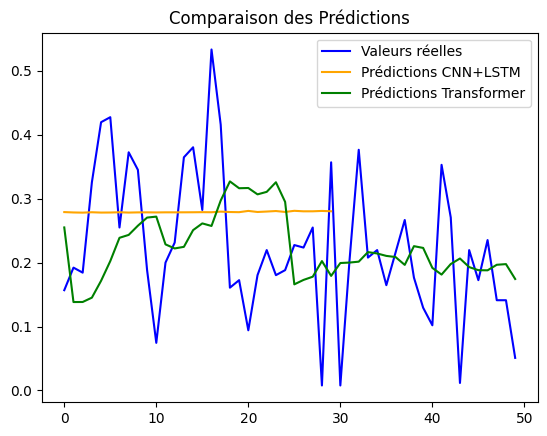

In [59]:
# Prédictions avec Transformer
transformer_predictions = transformer_model.predict(X[:50]).flatten()

# Graphique de comparaison
plt.plot(y[:50], label='Valeurs réelles', color='blue')
plt.plot(predictions[:50], label='Prédictions CNN+LSTM', color='orange')
plt.plot(transformer_predictions, label='Prédictions Transformer', color='green')
plt.title('Comparaison des Prédictions')
plt.legend()
plt.show()


**Calcul du coefficient de détermination (𝑅^2) pour le Transformer**

Cette étape évalue la capacité du modèle Transformer à expliquer la variance des données réelles en calculant le coefficient de détermination (𝑅^2). Une valeur proche de 1 indique que le modèle prédit efficacement les données cibles. Les prédictions générées par le modèle Transformer sont comparées aux valeurs réelles pour mesurer cette performance. Cela permet de juger objectivement la qualité du modèle sur l'ensemble des données.

In [60]:
# prédictions
predictions_transformer = transformer_model.predict(X).flatten()

# Calcul du coefficient de détermination (R²)
r2_transformer = r2_score(y, predictions_transformer)

print(f"Coefficient de détermination (R²) pour le modèle Transformer : {r2_transformer:.4f}")


135681/135681 ━━━━━━━━━━━━━━━━━━━━ 2292s 17ms/step
Coefficient de détermination (R²) pour le modèle Transformer : 0.4601
